In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("talk")  # thicker line

CODE_DIR = "/home/rock/Documents/NASA_SpaceApps_20191018/"
DATA_DIR = CODE_DIR + "data/"

SEALEVELS = "sea_levels.csv"
CO2 = "co2.csv"
TEMP = "temp.csv"

<span style="color:purple">
    <h2>Sea Level Change</h2>
<p><b>Model Sea Level Change since 1993</b></p>
</span>

In [3]:
# Model Sea Level Change over Time (years)
sl_df = pd.read_csv(DATA_DIR+SEALEVELS, header=None, skiprows=50, usecols=[2,11])
sl_df.columns = ['year', 'level']

In [4]:
x = sl_df['year'].values
y = sl_df['level'].values

model = LinearRegression().fit(x.reshape(-1, 1),y)

In [5]:
model.coef_  # Sea Level chnage per year = 3.29 mm

array([3.28898375])

<span style="color:black">
    <h3>Result: Sea Level chnage per year = 3.29 mm</h3>
</span>

<span style="color:purple">
    <h2>Carbon Dioxide</h2>
<p><b>Plot Carbon Dioxide Levels since 1958</b></p>
</span>

In [6]:
# Plot Carbon Dioxide Levels since 1958
co2df = pd.read_csv(DATA_DIR+CO2, header=None, skiprows=72, usecols=[2,3,5])
co2df.columns = ['year', 'average', 'trend']

[Text(0, 0.5, 'CO2 (ppm)'), Text(0.5, 0, 'year')]

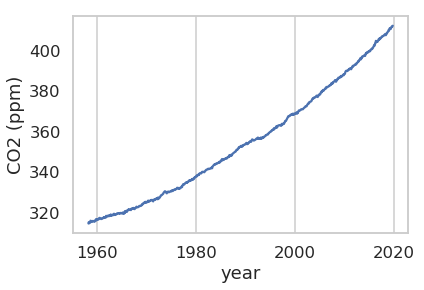

In [22]:
ax = sns.lineplot(co2df['year'], co2df['trend'])
ax.grid(b=False, axis='y')
ax.set(xlabel='year', ylabel='CO2 (ppm)')

In [23]:
# CO2 levels since 1993
co2_1993 = co2df.loc[co2df['year'] >= 1993, :]

In [42]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=co2_1993['year'], y=co2_1993['trend'], name="CO2 level", line=dict(color='blue', width=3)),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=sl_df['year'], y=sl_df['level'], name="Sea level", line=dict(color='red', width=3)),
    secondary_y=True
)

# Add figure title
fig.update_layout(
    title_text="<b>CO2 and Sea Level since 1993</b>",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis1={"gridcolor": "rgb(159, 197, 232)"},
    yaxis2={"gridcolor": "rgb(159, 197, 232)", "zerolinecolor": "rgb(74, 134, 232)"},
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Year</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>CO2 level (ppm)</b> ", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="<b>Sea level (mm)</b>", secondary_y=True)

fig.show()

<span style="color:purple">
    <h2>Temperature Change</h2>
<p><b>Plot Sea Temperature Change since 1880</b></p>
</span>

In [47]:
temp = pd.read_csv(DATA_DIR+TEMP, header=None, skiprows=5)
temp.columns = ['year', 'no_smoothing', "lowess"]

# Water Temperature since 1993
temp_1993 = temp[temp['year'] >= 1993]

In [64]:
# sl_df.shape  # 978, weekly
# co2_1993.shape  # 321, monthly
# temp_1993.shape  # 26, yearly

(978, 2)

<span style="color:purple">
    <h2>Predict Sea Level Change Vs Year, CO2 and Temperature since 1993</h2>
    <p><b>Normalize the data and make predictions from the linear model</b></p>
</span>

In [55]:
# Interpolation

co2_years = co2_1993['year'].values
co2_levels = co2_1993['trend'].values
sealevel_years = sl_df['year'].values
sealevel_levels = sl_df['level'].values
temp_years = temp_1993['year'].values
temp_levels = temp_1993['no_smoothing'].values

# Interpolate for quarterly values
years = np.linspace(start=1993, stop=2019, num=105)

co2_ip = np.interp(years, co2_years, co2_levels)
sl_ip = np.interp(years, sealevel_years, sealevel_levels)
temp_ip = np.interp(years, temp_years, temp_levels)

# Create a Dataframe with Independent Variables (year, CO2, temperature) and Dependent Variable (Sea Level)
df_ip = pd.DataFrame(data={'year': years, 'co2': co2_ip, 'temp': temp_ip, 'sea_level': sl_ip})

In [90]:
# Get Predictions from a linear model
m = linear_model.LinearRegression(normalize=True)  # Normalize the data
m.fit(df_ip[['year', 'co2', 'temp']], df_ip['sea_level'])  # Fit the model
predictions = m.predict(df_ip[['year', 'co2', 'temp']])

In [95]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_ip['year'], y=predictions, name="Predicted Sea Level", line=dict(color='green', width=3)),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=df_ip['year'], y=df_ip['sea_level'], name="Actual Sea level", line=dict(color='red', width=3)),
    secondary_y=True
)

# Add figure title
fig.update_layout(
    title_text="<b>Actual Vs Predicted Sea Level since 1993</b>",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis1={"gridcolor": "rgb(159, 197, 232)"},
    yaxis2={"gridcolor": "rgb(159, 197, 232)", "zerolinecolor": "rgb(74, 134, 232)"},
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Year</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Predicted (mm)</b> ", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="<b>Actual (mm)</b>", secondary_y=True)

fig.show()